In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [47]:
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/15-35-05_117/log_output.log'
#log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/16-03-47_195/log_output.log'
log_dir = '/neurospin/dico/jlaval/Output/2024-10-15/16-15-25_60/log_output.log'

In [48]:
data = pd.read_csv(log_dir, delimiter = ",", header = None, skiprows=9)
data.columns=['cutout', 'nb_vx', 'nb_vx_without_bottoms', 'nb_vx_after_without_bottoms']
print(data)
print(data.head())

                              cutout  nb_vx  nb_vx_without_bottoms  \
0       INFO:augmentations.py: False  532.0                  405.0   
1       INFO:augmentations.py: False  602.0                  496.0   
2        INFO:augmentations.py: True  597.0                  471.0   
3        INFO:augmentations.py: True  664.0                  540.0   
4        INFO:augmentations.py: True  531.0                  448.0   
...                              ...    ...                    ...   
8188     INFO:augmentations.py: True  577.0                  472.0   
8189     INFO:augmentations.py: True  663.0                  540.0   
8190     INFO:augmentations.py: True  663.0                  540.0   
8191    INFO:augmentations.py: False  720.0                  565.0   
8192  INFO:train.py: Fitting is done    NaN                    NaN   

      nb_vx_after_without_bottoms  
0                           249.0  
1                           169.0  
2                           419.0  
3              

In [49]:
l = data['cutout'].tolist()
data['cutout'] = [elem[-5:] for elem in l]

In [50]:
# for cutout
data_cutout = data.loc[data['cutout']==' True']
np.mean(data_cutout['nb_vx']), np.mean(data_cutout['nb_vx_without_bottoms']), np.mean(data_cutout['nb_vx_after_without_bottoms'])

(614.7067908801176, 497.060554057367, 412.756557979897)

In [51]:
# for cutin
data_cutin = data.loc[data['cutout']=='False']
np.mean(data_cutin['nb_vx']), np.mean(data_cutin['nb_vx_without_bottoms']), np.mean(data_cutin['nb_vx_after_without_bottoms'])

(615.0568927789934, 497.2771699489424, 174.15998054947727)

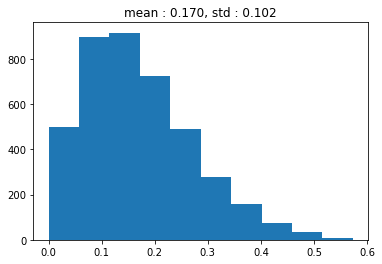

In [52]:
## plot the distributions of the proportion of non 30 vx removed
# cutout
l_before = data_cutout['nb_vx_without_bottoms'].tolist()
l_after = data_cutout['nb_vx_after_without_bottoms'].tolist()
removed_cutout = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutout)
plt.title(f"mean : {np.mean(removed_cutout):.3f}, std : {np.std(removed_cutout):.3f}")
plt.show()

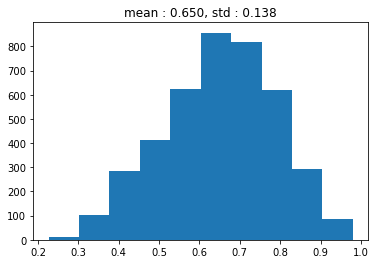

In [53]:
# cutin
l_before = data_cutin['nb_vx_without_bottoms'].tolist()
l_after = data_cutin['nb_vx_after_without_bottoms'].tolist()
removed_cutin = [(before - after) / before for before, after in zip(l_before, l_after)]
plt.hist(removed_cutin)
plt.title(f"mean : {np.mean(removed_cutin):.3f}, std : {np.std(removed_cutin):.3f}")
plt.show()